Index(['ID', 'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h',
       'mu_V', 'rho_0', 'lg_tc', 'lg_th', 'Name', 'RA', 'DEC', 'L', 'B',
       'R_Sun', 'R_gc', 'X', 'Y', 'Z'],
      dtype='object')
(157, 23)
    bin_label     lg_tc     lg_th  count
16  (6, 7, 5)  7.517143  8.188689     62
26  (7, 7, 5)  7.825625  8.646364     33
12  (6, 6, 5)  8.635455  9.209167     12
23  (7, 6, 5)  8.392000  9.036667      6
25  (7, 7, 4)  7.680000  9.155000      4


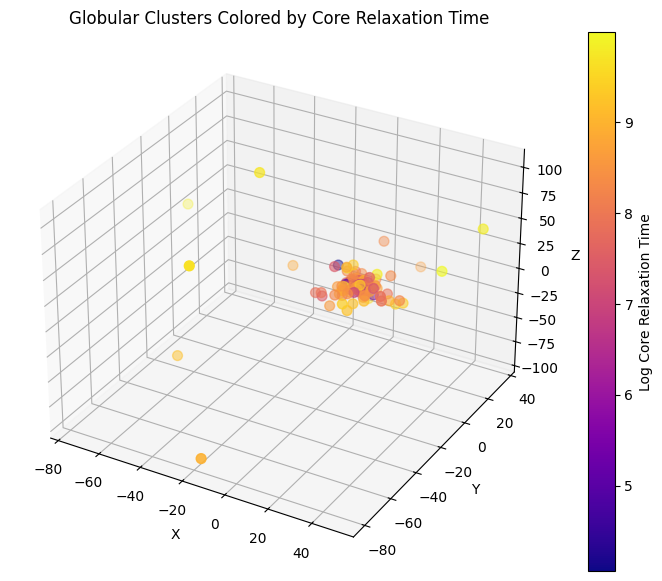

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

partI = pd.read_csv("/Users/ashhadkhan/Desktop/PHYS3116/computational stuff/phys3116_I_don-t_know/data/HarrisPartI.csv")
partIII = pd.read_csv("/Users/ashhadkhan/Desktop/PHYS3116/computational stuff/phys3116_I_don-t_know/data/HarrisPartIII.csv")

# Merge both datasets, based on 'ID' and 
merged = pd.merge(partIII, partI, on='ID', how='inner')  # keeps only clusters in both
print(merged.columns)
print(merged.shape)

n_bins = 10 #no. of bins

# Bin indices for each cluster
merged['x_bin'] = np.digitize(merged['X'], bins=np.linspace(merged['X'].min(), merged['X'].max(), n_bins))
merged['y_bin'] = np.digitize(merged['Y'], bins=np.linspace(merged['Y'].min(), merged['Y'].max(), n_bins))
merged['z_bin'] = np.digitize(merged['Z'], bins=np.linspace(merged['Z'].min(), merged['Z'].max(), n_bins))

merged['bin_label'] = merged.apply(lambda row: (row['x_bin'], row['y_bin'], row['z_bin']), axis=1) #combine


bin_stats = merged.groupby('bin_label')[['lg_tc', 'lg_th']].mean().reset_index() #avg. lag times per bin
bin_counts = merged.groupby('bin_label').size().reset_index(name='count') # no. of clusters per bin
bin_summary = pd.merge(bin_stats, bin_counts, on='bin_label')
print(bin_summary.sort_values('count', ascending=False).head())


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter each cluster colored by core relaxation time
sc = ax.scatter(merged['X'], merged['Y'], merged['Z'], c=merged['lg_tc'], cmap='plasma', s=50)
plt.colorbar(sc, label='Log Core Relaxation Time')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Globular Clusters Colored by Core Relaxation Time')
plt.show()



It looks like lg_th is increasing as we go outwards, which makes sense because the half-mass relaxation time should be longer for more diffuse clusters further out in the halo
We do see lg_tc somewhat increasing with radius too, but there is more scatter. This also makes sense since core properties can vary more due to internal dynamics and interactions
Overall, the trends align with expectations that clusters further out in the halo tend to be less dense and have longer relaxation times.


In [57]:
#3 least dense bins
least_dense_bin_labels = [(6,6,5), (7,6,5), (7,7,4)]

# clusters in these bins
least_dense_clusters = merged[merged['bin_label'].isin(least_dense_bin_labels)]

# properties of those clusters
print(least_dense_clusters[['ID','Name','X','Y','Z','lg_tc','lg_th','v_r','sig_v']])

           ID         Name     X     Y     Z  lg_tc  lg_th    v_r  sig_v
11   NGC 2298          NaN  -4.3  -9.4  -3.0   7.91   8.84  148.9    NaN
15   NGC 2808          NaN   2.0  -9.2  -1.9   8.24   9.15  101.6   13.4
16        E 3          NaN   2.9  -7.1  -2.6   8.93   8.80    NaN    NaN
18   NGC 3201          NaN   0.6  -4.8   0.7   8.61   9.27  494.0    5.0
22   NGC 4372          NaN   2.9  -4.9  -1.0   8.88   9.59   72.3    NaN
24   NGC 4590         M 68   4.1  -7.2   6.0   8.45   9.27  -94.7    2.5
25   NGC 4833          NaN   3.6  -5.4  -0.9   8.78   9.42  200.2    NaN
28   NGC 5139    omega Cen   3.1  -3.9   1.3   9.60  10.09  232.1   16.8
30   NGC 5286          NaN   7.6  -8.6   2.1   8.40   9.11   57.4    8.1
40   NGC 5927          NaN   6.4  -4.2   0.7   8.39   8.94 -107.5    NaN
41   NGC 5946          NaN   8.9  -5.6   0.8   6.90   8.91  128.4    4.0
42     BH 176          NaN  16.1  -9.9   1.4   9.14   8.79    NaN    NaN
43   NGC 5986          NaN   9.3  -4.0   2.4   8.58

In [58]:
print("Merged (Harris) columns:", merged.columns.tolist())
print("Krause columns:", krause.columns.tolist())
print("VandenBerg columns:", vdb.columns.tolist())

Merged (Harris) columns: ['ID', 'v_r', 'v_r_e', 'v_LSR', 'sig_v', 'sig_v_e', 'c', 'r_c', 'r_h', 'mu_V', 'rho_0', 'lg_tc', 'lg_th', 'Name', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y', 'Z', 'x_bin', 'y_bin', 'z_bin', 'bin_label']
Krause columns: ['Class', 'NGC_ID', 'AltName', 'Mstar', 'rh', 'C5', 'Age', 'FeH']
VandenBerg columns: ['NGC_ID', 'Name', 'FeH', 'Age', 'Age_err', 'Method', 'Figs', 'Range', 'HBtype', 'R_G', 'M_V', 'v_e0', 'log_sigma_0']


In [59]:
# Merging all 3 (merged Harris[merged earlier] , Krause21, vandenBerg) datasets
krause = pd.read_csv('/Users/ashhadkhan/Desktop/PHYS3116/computational stuff/phys3116_I_don-t_know/data/Krause21.csv')
vdb = pd.read_csv('/Users/ashhadkhan/Desktop/PHYS3116/computational stuff/phys3116_I_don-t_know/data/vandenBerg_table2.csv')

merged = pd.merge(partIII, partI, on='ID', how='inner')
merged['NGC_ID'] = merged['ID']

# Standardize Krause NGC_ID
if 'Object' in krause.columns:
    krause.rename(columns={'Object': 'NGC_ID'}, inplace=True)

# Standardize VandenBerg NGC_ID
if '#NGC' in vdb.columns:
    vdb.rename(columns={'#NGC': 'NGC_ID'}, inplace=True)

vdb['NGC_ID'] = pd.to_numeric(vdb['NGC_ID'], errors='coerce')
vdb = vdb.dropna(subset=['NGC_ID'])
vdb['NGC_ID'] = vdb['NGC_ID'].astype(int).apply(lambda x: f"NGC {x}")

# Merge all three datasets
merged_all = (
    merged
    .merge(krause, on='NGC_ID', how='outer', suffixes=('_harris', '_krause'))
    .merge(vdb, on='NGC_ID', how='outer', suffixes=('', '_vdb'))
)

# Remove duplicate columns
merged_all = merged_all.loc[:, ~merged_all.columns.duplicated()]


# Standardize naming
merged_all_clean = merged_all_clean.rename(columns={
    'Name': 'Name_harris',
    'Age': 'Age_krause',
    'FeH': 'FeH_krause'
})

# Combine ages & metallicities (take mean where both available)
merged_all_clean['Age_combined'] = merged_all_clean[['Age_krause', 'Age_vdb']].mean(axis=1)
merged_all_clean['FeH_combined'] = merged_all_clean[['FeH_krause', 'FeH_vdb']].mean(axis=1)

# Keep only important columns for science analysis
cols_to_keep = [
    'NGC_ID', 'Name_harris', 'Name_vdb',
    'X', 'Y', 'Z', 'v_r', 'sig_v',
    'Age_krause', 'Age_vdb', 'Age_combined',
    'FeH_krause', 'FeH_vdb', 'FeH_combined'
]
merged_all_clean = merged_all_clean[cols_to_keep]

print("Cleaned dataset shape:", merged_all_clean.shape)
merged_all_clean.head()

Cleaned dataset shape: (270, 14)


,NGC_ID,Name_harris,Name_vdb,X,Y,Z,v_r,sig_v,Age_krause,Age_vdb,Age_combined,FeH_krause,FeH_vdb,FeH_combined
0,2MASS-GC01,2MASS-GC01,NaN,3.5,0.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2MASS-GC02,2MASS-GC02,NaN,4.9,0.8,-0.1,-238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47 Tuc,47 Tuc,NaN,1.9,-2.6,-3.1,-18.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AL 3,AL 3,NaN,6.5,0.4,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AvdB,AvdB,NaN,49.7,27.3,51.4,72.3,0.4,NaN,NaN,NaN,NaN,NaN,NaN


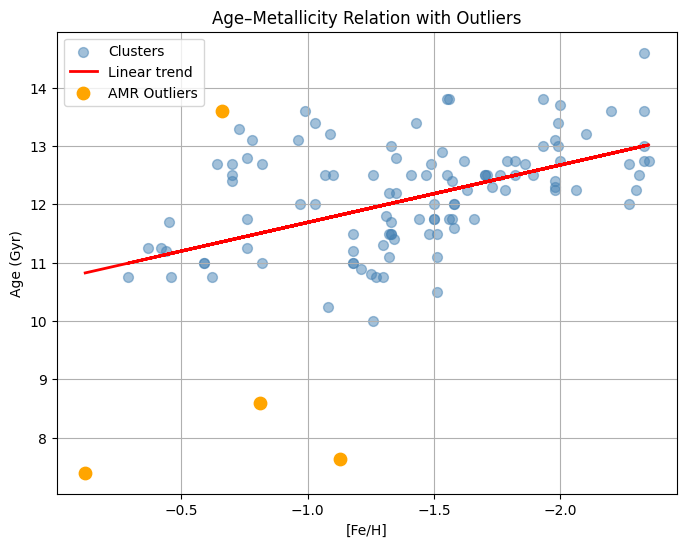

In [ ]:
df = merged_all_clean.dropna(subset=['Age_combined', 'FeH_combined'])

# Prepare data
X = df['FeH_combined'].values.reshape(-1,1)  # predictor
y = df['Age_combined'].values  # target

# Fit linear model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


#So we already have the least dense clusters from before
#Now we can see if any of those are outliers in the age-metallicity relation
#Since we used NGC_ID as the key for merging, we will have to put NGC_ID in least_dense_clusters
# We can do this by merging least_dense_clusters with merged_all_clean on 'ID' and 'NGC_ID'
#then i plotted the age-metallicity relation with outliers highlighted, and highlighted the least dense clusters among those outliers,

plt.figure(figsize=(8,6))

# All clusters
plt.scatter(df['FeH_combined'], df['Age_combined'], c='steelblue', s=50, alpha=0.5, label='Clusters')

# Linear trend
plt.plot(df['FeH_combined'], y_pred, color='red', lw=2, label='Linear trend')

# Age–Metallicity outliers
plt.scatter(outliers['FeH_combined'], outliers['Age_combined'], c='orange', s=80, label='AMR Outliers')

# Least dense + AMR outliers (highlight in green, for example)
if not least_dense_outliers.empty:
    plt.scatter(
        least_dense_outliers['FeH_combined'],
        least_dense_outliers['Age_combined'],
        c='green',
        s=100,
        label='Least Dense AMR Outliers'
    )

plt.xlabel('[Fe/H]')
plt.ylabel('Age (Gyr)')
plt.title('Age–Metallicity Relation with Outliers')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()



something interesting is that none of the least dense clusters are outliers in the age-metallicity relation
The clusters that are outliers in the age-metallicity relation tend to be more metal-rich and younger, suggesting they may have different formation histories or origins compared to the bulk of the globular cluster population and may be accreted clusters
The least dense clusters, on the other hand, do not appear to be outliers in this relation, indicating that their low densities are not necessarily linked to unusual ages or metallicities.
they could be native to the Milky Way but have expanded and become less dense over time due to internal dynamics and tidal interactions
I will try to make a plot the other way from before, with the least dense clusters highlighted in the 3D scatter plot of position colored by relaxation time



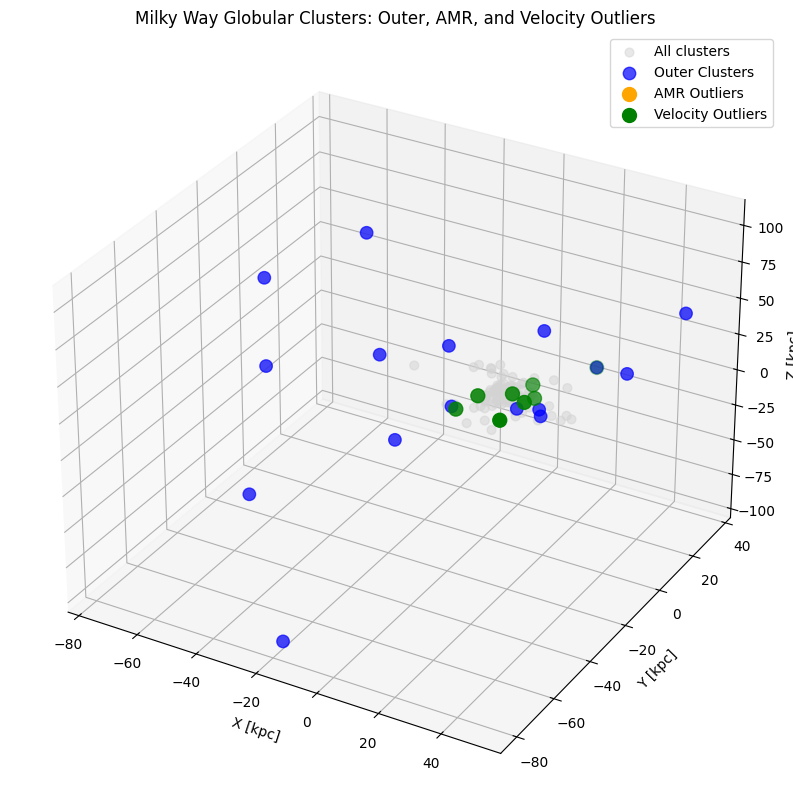

In [71]:

# --- Standardize NGC_ID formatting ---
merged_all_clean['NGC_ID'] = merged_all_clean['NGC_ID'].str.replace(' ','').str.upper()
outliers['NGC_ID'] = outliers['NGC_ID'].str.replace(' ','').str.upper()

# --- Compute 3D distance from Galactic center ---
merged_all_clean['R_gc_3D'] = np.sqrt(merged_all_clean['X']**2 +
                                      merged_all_clean['Y']**2 +
                                      merged_all_clean['Z']**2)

# --- Outer/isolated clusters (top 10% in R_gc_3D) ---
outer_clusters = merged_all_clean[merged_all_clean['R_gc_3D'] > merged_all_clean['R_gc_3D'].quantile(0.9)]

# --- Velocity outliers (radial velocity > 2σ from mean) ---
v_r_mean = merged_all_clean['v_r'].mean()
v_r_std = merged_all_clean['v_r'].std()
velocity_outliers = merged_all_clean[(merged_all_clean['v_r'] > v_r_mean + 2*v_r_std) |
                                     (merged_all_clean['v_r'] < v_r_mean - 2*v_r_std)]

# --- Age–Metallicity outliers ---
amr_outliers = merged_all_clean[merged_all_clean['NGC_ID'].isin(outliers['NGC_ID'])]

# --- 3D plot ---
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# All clusters
ax.scatter(merged_all_clean['X'], merged_all_clean['Y'], merged_all_clean['Z'],
           c='lightgray', s=40, alpha=0.5, label='All clusters')

# Outer/isolated clusters
ax.scatter(outer_clusters['X'], outer_clusters['Y'], outer_clusters['Z'],
           c='blue', s=80, alpha=0.7, label='Outer Clusters')

# AMR outliers
ax.scatter(amr_outliers['X'], amr_outliers['Y'], amr_outliers['Z'],
           c='orange', s=100, label='AMR Outliers')

# Velocity outliers
ax.scatter(velocity_outliers['X'], velocity_outliers['Y'], velocity_outliers['Z'],
           c='green', s=100, label='Velocity Outliers')

# Labels and title
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
ax.set_title('Milky Way Globular Clusters: Outer, AMR, and Velocity Outliers')
ax.legend()
plt.show()


These 2 plots show us that the outer clusters are spread over a big volume, quite far from the Galactic centre. The velocity outliers are a bit closer, actually significantly closer to the centre regions but unusual motion, and do not follow the main rotation trend of the MW. 
This tells us that the outliers most likely represent accreted clusters, clusters formed in sattalite dwarf galaxies and later captured by MW. The 'normal' kinematics clusters near the galactic centre most likely formed as part of the MW itself. 

The plot before of the Age metallicity relation show a rough linear trend with older clusters tending to be more metal-poor. The outliers on the other hand are younger than expected for their metallicity, this suggests formation in environments with different chemical enrichment histories.  